In [1]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as img
import keras
import math

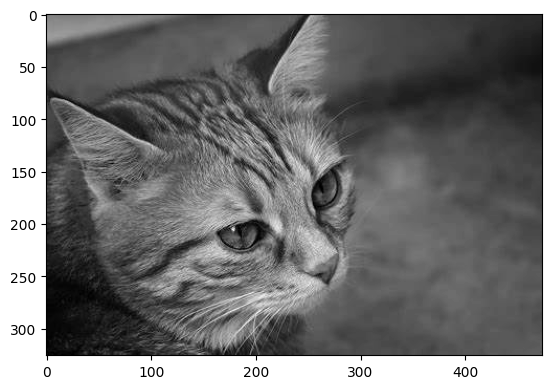

In [2]:
import scipy
from scipy.ndimage import correlate
image=cv2.imread('/content/cat.jpeg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')

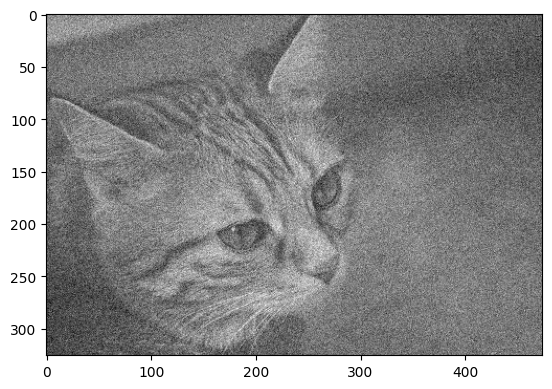

In [3]:
def add_gaussian_noise(image, mean, stdev):
  noise=np.random.normal(mean, stdev, image.shape)
  new_image = image+noise
  return new_image
gnoise_img = add_gaussian_noise(image, 20, 34)
plt.imshow(gnoise_img, cmap='gray')

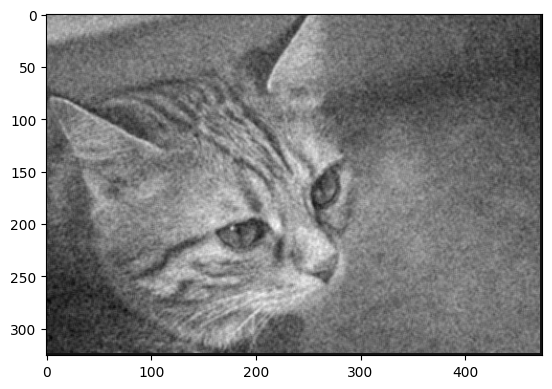

In [4]:
def average_filter(image, mask):
  row, column = image.shape
  mh, mw = mask.shape
  filtered_image=np.zeros(image.shape)
  for i in range(row-mh+1):
    for j in range(column-mw+1):
      rows=range(i, i+mh)
      columns=range(j,j+mw)
      part=image[np.ix_(rows, columns)]*mask
      filtered_image[i,j]=part.sum()
  return np.array(filtered_image)

mask=np.array([[1/9, 1/9,1/9], [1/9, 1/9,1/9], [1/9, 1/9,1/9]])
plt.imshow(average_filter(gnoise_img, mask), cmap='gray')

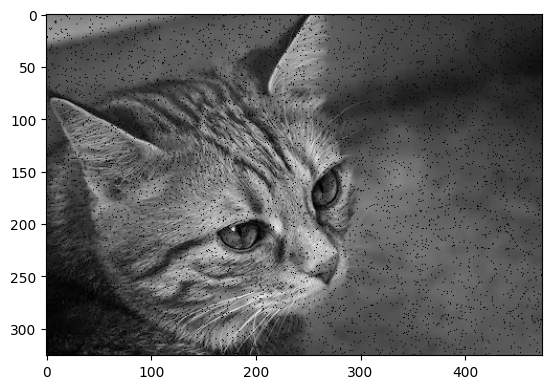

In [5]:
def add_SnP_noise(image):
  n=5000
  x=np.random.randint(0, image.shape[0],n)
  y=np.random.randint(0,image.shape[1],n)
  new_image=image
  for i in range(len(x)):
    new_image[x[i]][y[i]]=np.random.choice(a=[0,1])
  return new_image

snp_image=add_SnP_noise(image)
plt.imshow(snp_image, cmap='gray')

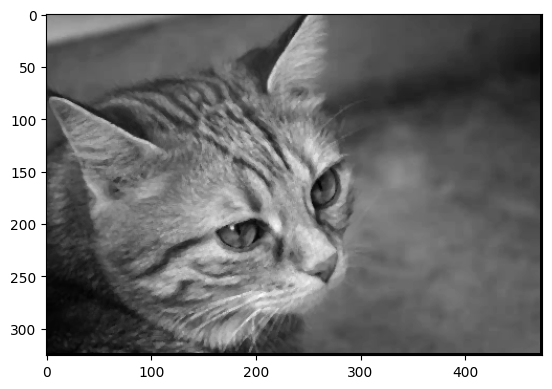

In [6]:
def median_filtering(image):
  row, column = image.shape
  mh, mw = 3,3
  new_image=np.zeros((row, column))
  for i in range(row-mw+1):
    for j in range(column-mh+1):
      rows=range(i, i+mw)
      columns=range(j, j+mh)
      part=np.sort(np.ravel(image[np.ix_(rows, columns)]))
      new_image[i,j]=part[5]
  return new_image

med_image=median_filtering(snp_image)
plt.imshow(med_image, cmap='gray')